# Musterlösung zu Übungsblatt 1 

 * [Aufgabe 1](#Aufgabe-1)
 * [Aufgabe 2](#Aufgabe-2)
 * [Aufgabe 3](#Aufgabe-3)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
plt.style.use('ggplot')

---
## Aufgabe 1
Gegeben sei eine parametrische Funktion $y = f(x)$, $y = 1 + a_1x + a_2x^2$ mit Parametern $a_1 = 2.0 ± 0.2$, $a_2 = 1.0 ± 0.1$ und Korrelationskoeffizient $ρ = −0.8$.

---

In [2]:
a1, a1_err = 2.0, 0.2
a2, a2_err = 1.0, 0.1
rho = -0.8

---
### 1.1
Geben Sie die Kovarianzmatrix von $a_1$ und $a_2$ an.

---

Die Kovarianzmatrix von $a_1$ und $a_2$ lässt sich wie folgt berechnen:

$$\mathrm{Cov}(a) = \pmatrix{\sigma^2_{a_1} & \rho\sigma_{a_1}\sigma_{a_2} \\
                                               \rho\sigma_{a_1}\sigma_{a_2} & \sigma^2_{a_2}}$$

In [3]:
c12 = rho * a1_err * a2_err
covariance = np.matrix([[a1_err ** 2, c12], [c12, a2_err ** 2]])
covariance

matrix([[ 0.04 , -0.016],
        [-0.016,  0.01 ]])

---
### 1.2
Bestimmen Sie analytisch die Unsicherheit von $y$ als Funktion von $x$:

---

Dazu bestimmen wir zunaechst die Ableitungen von $y$ nach $a_1$ und $a_2$

$$\frac{\partial{}y}{\partial{}a_1} = x \,,\quad \frac{\partial{}y}{\partial{}a_2} = x^2 \,.$$

Daraus können wir die Kovarianz von $y$ nach

$$\sigma^2_y = \mathrm{Cov}(y) = \sum_{ij}\frac{\partial{}y}{\partial{}a_i}\frac{\partial{}y}{\partial{}a_j}\mathrm{Cov}(a)_{ij}$$

bestimmen. Einsetzen der eingangs bestimmten Ableitungen liefert

$$\sigma^2_y = c_{11}x^2 + 2c_{12}x^3 + c_{22}x^4$$

wobei die $c_{ij}$ die Einträge von $\mathrm{Cov}(a)$ sind. Der Ausdruck lässt sich weiter vereinfachen zu

$$\sigma^2_y = x^2\left(\sigma^2_{a_1} + \sigma^2_{a_2}x^2 + 2\rho\sigma_{a_1}\sigma_{a_2}x\right) \,.$$

Daraus ergibt sich für die Unsicherheit

$$ \sigma_y = \lvert{}x\rvert\sqrt{\sigma^2_{a_1} + \sigma^2_{a_2}x^2 + 2\rho\sigma_{a_1}\sigma_{a_2}x} \,.$$

---
#### 1.2.1
unter Vernachlässigung der Korrelation

---

(also für $\rho = 0$) vereinfacht sich der obige Ausdruck zu

$$\sigma_y = \lvert{}x\rvert\sqrt{\sigma^2_{a_1} + \sigma^2_{a_2}x^2} \,.$$

Mit den eingangs berechneten Werten aus `covariance` ergibt sich also

$$\sigma_y = \lvert{}x\rvert\sqrt{0.04 + 0.01x^2} = 0.2\lvert{}x\rvert{}\sqrt{1 + 0.25x^2} \,.$$

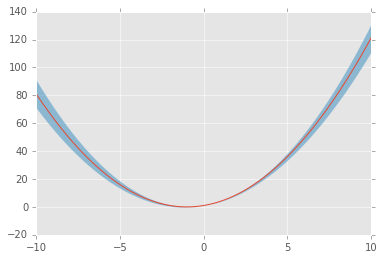

In [4]:
def err_ana_wo(x):
    return 0.2 * np.abs(x) * np.sqrt(1 + 0.25 * x ** 2)

xs = np.linspace(-10, 10, 10000)
ys = 1 + a1 * xs + a2 * xs ** 2
errs = err_ana_wo(xs)

plt.plot(xs, ys)
plt.fill_between(xs, ys - errs, ys + errs, alpha=0.5)
plt.show()

---
#### 1.2.2
mit Berücksichtigung der Korrelation

---

$$\sigma_y = \lvert{}x\rvert\sqrt{0.04 + 0.01x^2 - 0.016x} = 0.2\lvert{}x\rvert\sqrt{1 + 0.25x^2 - 0.4x} \,.$$

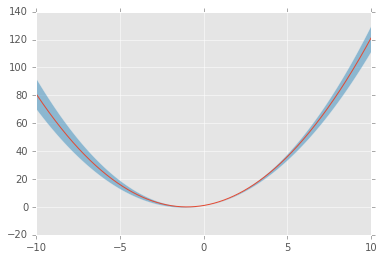

In [5]:
def err_ana(x):
    return 0.2 * np.abs(x) * np.sqrt(1 + 0.25 * x ** 2 - 0.4 * x)

errs = err_ana(xs)

plt.plot(xs, ys)
plt.fill_between(xs, ys - errs, ys + errs, alpha=0.5)
plt.show()

---
### 1.3
Bestimmen Sie per Monte Carlo die Unsicherheit von $y$ als Funktion von $x$:

#### 1.3.1
Generieren Sie Wertepaare $(a_1, a_2)$ gemäß ihrer Kovarianzmatrix und visualisieren Sie diese, z.B. mit einem Scatter-Plot.

_Hinweis_: Wenn $x_1$ und $x_2$ zwei gaussverteilte Zufallszahlen mit Mittelwert null und Varianz eins sind, erhält man ein Paar korrelierter gaussverteilter Zufallszahlen $(y_1, y_2)$ mit Mittelwert null und Varianz eins durch $(y_1 = x_1; y_2 = x_1ρ + x_2\sqrt{1 − \rho^2})$.

---

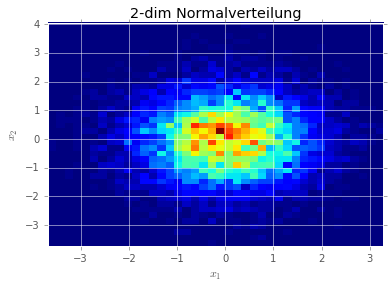

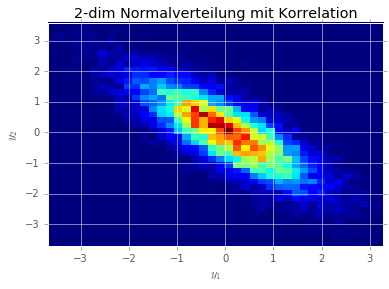

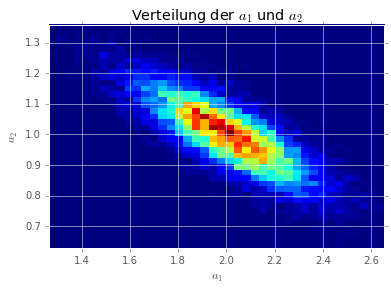

In [6]:
x1s, x2s = np.random.normal(size=(2, 10000))
plt.hist2d(x1s, x2s, bins=40)
plt.title('2-dim Normalverteilung')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

y1s = x1s
y2s = x1s * rho + x2s * np.sqrt(1 - rho ** 2)
plt.hist2d(y1s, y2s, bins=40)
plt.title('2-dim Normalverteilung mit Korrelation')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.show()

a1s = a1 + y1s * a1_err
a2s = a2 + y2s * a2_err
plt.hist2d(a1s, a2s, bins=40)
plt.title('Verteilung der $a_1$ und $a_2$')
plt.xlabel('$a_1$')
plt.ylabel('$a_2$')
plt.show()

---
#### 1.3.2
Bestimmen Sie die Verteilung von $y$ für $x = \{−1, 0, +1\}$ und vergleichen Sie Mittelwert und Varianz (Standardabweichung) mit den Resultaten der analytischen Rechnung.

---

〈y(-1)〉= -0.002
 σ² = 0.083
 analytical = 0.056


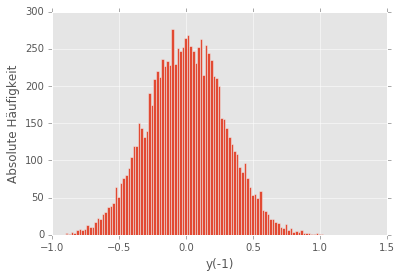

〈y(0)〉= 1.000
 σ² = 0.000
 analytical = 0.000


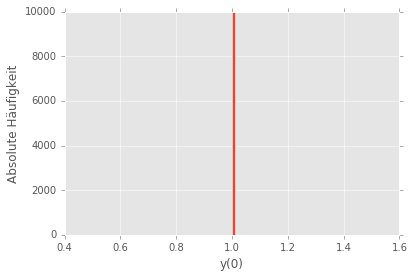

〈y(1)〉= 4.001
 σ² = 0.018
 analytical = 0.044


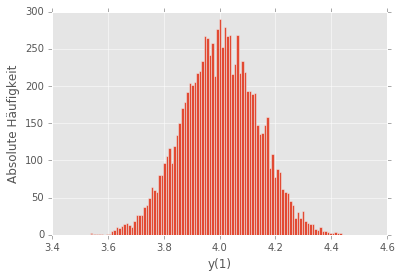

In [7]:
def y(x, a1, a2):
    return 1 + a1 * x + a2 * x ** 2


def var_analytical(x):
    xx = x ** 2
    return 0.04 * xx * (1 + 0.25 * xx - 0.16 * x)
    

for x in (-1, 0, 1):
    ys = y(x, a1s, a2s)
    mean = np.mean(ys)
    var = np.var(ys)
    print('〈y({})〉= {:.3f}'.format(x, mean))
    print(' σ² = {:.3f}'.format(var))
    print(' analytical = {:.3f}'.format(var_analytical(x)))
    plt.hist(ys, bins=100)
    plt.xlabel('y({})'.format(x))
    plt.ylabel('Absolute Häufigkeit')
    plt.show()

Der Fall $x = 0$ ist hier besonders. Da alle Koeffizienten vor Potenzen von $x$ stehen, ergibt sich für den Fall immer $y=0$ unabhängig von den $a_i$. Wir können also keine Aussage über die Varianz treffen.

---
## Aufgabe 2
Betrachten Sie folgende Reparametrisierung von $y = f(x)$:
    
$$y = 1 + \frac{x(1+x)}{b_1} + \frac{x(1-x)}{b_2}$$

### 2.1
Bestimmen Sie analytisch die transformierten Parameter $b_1$ und $b_2$ und deren Kovarianzmatrix

---

Wir lösen die Reparametrisierung nach Koeffizienten von Potenzen von $x$ auf. Dabei können wir den Term $1$ vernachlässigen, weil er in beiden Definitionen gleichermaßen auftritt.

\begin{align}
 a_1 x + a_2 x^2 &= \frac{x(1 + x)}{b_1} + \frac{x(1 - x)}{b_2} \\
                 &= \frac{x}{b_1} + \frac{x^2}{b_1} + \frac{x}{b_2} - \frac{x^2}{b_2} \\
                 &= x\left(\frac{1}{b_1} + \frac{1}{b_2}\right) + x^2\left(\frac{1}{b_1} - \frac{1}{b_2}\right)
\end{align}

Damit ist

$$a_1 = \left(\frac{1}{b_1} + \frac{1}{b_2}\right) \quad\text{und}\quad a_2 = \left(\frac{1}{b_1} - \frac{1}{b_2}\right)$$

also

$$b_1 = \frac{2}{a_1 + a_2} \quad\text{und}\quad b_2 = \frac{2}{a_1 - a_2} \,.$$

Für die Jacobimatrix der Transformation ergibt sich

\begin{equation}
    M = \pmatrix{
        \frac{-2}{(a_1 + a_2)^2} & \frac{-2}{(a_1 + a_2)^2} \\
        \frac{-2}{(a_1 - a_2)^2} & \frac{+2}{(a_1 - a_2)^2}      
    } \quad\text{wobei}\quad m_{ij} = \frac{\partial b_i}{\partial a_j}
\end{equation}

\begin{equation}
    M^T = \pmatrix{
        \frac{-2}{(a_1 + a_2)^2} & \frac{-2}{(a_1 - a_2)^2} \\
        \frac{-2}{(a_1 + a_2)^2} & \frac{+2}{(a_1 - a_2)^2}      
    }
\end{equation}

Die transformierte Kovarianzmatrix ist dann $\mathrm{Cov}(b) = M\mathrm{Cov}(a)M^T$.

In [8]:
b1 = 2 / (a1 + a2)
b2 = 2 / (a1 - a2)

denom1 = (a1 + a2) ** 2
denom2 = (a1 - a2) ** 2

M = np.matrix([[-2 / denom1, -2 / denom1], [-2 / denom2, 2 / denom2]])
cov_b = M * covariance * M.T
cov_b

matrix([[ 0.00088889,  0.01333333],
        [ 0.01333333,  0.328     ]])

---
### 2.2
Bestimmen Sie die Kovarianzmatrix der transformierten Parameter per Monte Carlo

---

b1 = 0.6678076014919944
var = 0.0009033935228944976
b2 = 2.312116036153896
var = 31.364584105291485


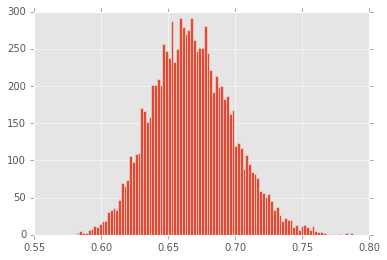

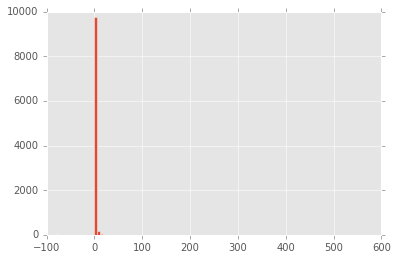

In [9]:
b1s = 2 / (a1s + a2s)
b2s = 2 / (a1s - a2s)

print('b1 = {}'.format(np.mean(b1s)))
print('var = {}'.format(np.var(b1s)))
print('b2 = {}'.format(np.mean(b2s)))
print('var = {}'.format(np.var(b2s)))

plt.hist(b1s, bins=100)
plt.show()
plt.hist(b2s, bins=100)
plt.show()

Dabei tritt das Problem auf, dass für einige Kombinationen von Werten für $a_1$ und $a_2$ der Nenner sehr nah an `0` kommt. Dadurch ergeben sich sehr große (unrealistische) Werte für $b_2$. Wir können dem entgegenwirken, indem wir einen Bereich festlegen in dem wir die Werte für $b_2$ erwarten.

b2 gefiltert = 2.1386405127392183
var = 0.4553051901466126


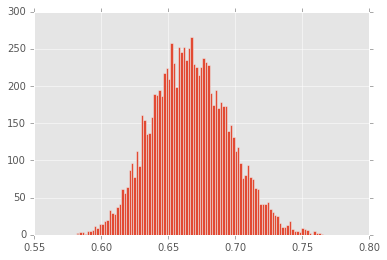

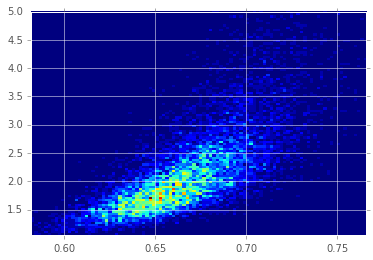

In [10]:
cut = np.logical_and(b2s < 5, b2s > 0)

b1s_ = b1s[cut]
b2s_ = b2s[cut]

print('b2 gefiltert = {}'.format(np.mean(b2s_)))
print('var = {}'.format(np.var(b2s_)))

plt.hist(b1s_, bins=100)
plt.show()

plt.hist2d(b1s_, b2s_, bins=100)
plt.show()

Wenn wir uns das Leben etwas erleichtern wollen, koennen wir auch einfach die Funktion `cov` aus Numpy verwenden, die uns fuer zwei Arrays direkt die Kovarianzmatrix ausrechnet

In [11]:
ncov_b = np.cov(b1s_, b2s_)
ncov_b

array([[ 0.0008353 ,  0.01402655],
       [ 0.01402655,  0.45535159]])

---
### 2.3
Bestimmen Sie analytisch die Unsicherheit von $y$ als Funktion von $x$:

#### 2.3.1
unter Verwendung der analytisch bestimmten Kovarianzmatrix von $(b_1, b_2)$

---

Zunächst berechnen wir die partiellen Ableitungen von $y$ nach den Koeffizienten $b_1$ und $b_2$.

\begin{equation}
    \frac{\partial y}{\partial b_1} = \frac{-x(1+x)}{b_1^2} \quad\text{und}{\quad} \frac{\partial y}{\partial b_2} = \frac{-x(1-x)}{b_2^2}
\end{equation}

Damit ergibt sich für die Varianz

\begin{align}
    \sigma_y^2 &= \sum_{ij}\frac{\partial y}{\partial b_i}\frac{\partial y}{\partial b_j}\mathrm{Cov}(b)_{ij} \\
               &= \frac{x^2(1+x)^2}{b_1^4}\sigma_{b_1}^2 + 2\frac{x^2 - x^3}{b_1^2b_2^2}\rho\sigma_{b_1}\sigma_{b_2} + \frac{x^2(1-x)^2}{b_2^4}\sigma_{b_2}^2 \\
               &= x^2\left[(\alpha+\beta)x^2 + (2\alpha - 2\beta - \gamma)x + (\alpha + \beta + \gamma)\right] \\
               &= x^2\left(c_2x^2 + c_1x + c_0\right)
\end{align}

mit den Koeffizienten

\begin{equation}
    \alpha = \frac{\sigma_{b_1}^2}{b_1^4} \quad,\quad
    \beta = \frac{\sigma_{b_2}^2}{b_2^4} \quad\text{und}\quad
    \gamma = \frac{\rho\sigma_{b_1}\sigma_{b_2}}{b_1^2b_2^2} \,.
\end{equation}

In Zahlen ausgedrückt sind die Koeffizienten

In [12]:
s2_b1 = cov_b[0, 0]
s2_b2 = cov_b[1, 1]
rho12 = cov_b[0, 1]

alpha = s2_b1 / b1 ** 4
beta = s2_b2 / b2 ** 4
gamma = rho12 / b1 ** 2 / b2 ** 2

c2 = alpha + beta
c1 = 2 * c2 - gamma
c0 = c2 + gamma

c2, c1, c0

(0.025000000000000005, 0.04250000000000001, 0.032500000000000008)

Es ist also

\begin{equation}
    \sigma_y^2 = x^2\left(0.025x^2 + 0.0425x + 0.0325\right)
\end{equation}

und damit

\begin{equation}
    \sigma_y = \lvert{}x\rvert\sqrt{0.025x^2 + 0.0425x + 0.0325}
\end{equation}

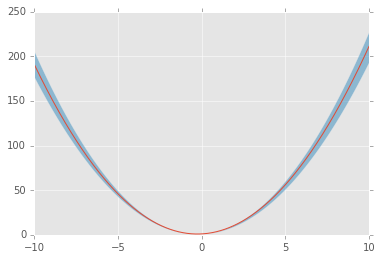

In [13]:
def err_ana(x):
    return np.abs(x) * np.sqrt(c2 * x ** 2 + c1 * x + c0)

xs = np.linspace(-10, 10, 10000)
ys = 1 + xs * (xs + 1) / b1 + xs * (xs - 1) / b2
errs = err_ana(xs)

plt.plot(xs, ys)
plt.fill_between(xs, ys - errs, ys + errs, alpha=0.5)
plt.show()

---
#### 2.3.2
unter Verwendung der numerisch bestimmten Kovarianzmatrix von $(b_1, b_2)$

---

Die gleiche Rechnung mit den per Monte Carlo bestimmten Werten

In [14]:
s2_b1 = ncov_b[0, 0]
s2_b2 = ncov_b[1, 1]
rho12 = ncov_b[0, 1]

alpha = s2_b1 / b1 ** 4
beta = s2_b2 / b2 ** 4
gamma = rho12 / b1 ** 2 / b2 ** 2

c2n = alpha + beta
c1n = 2 * c2 - gamma
c0n = c2 + gamma

c2n, c1n, c0n

(0.032688177932642684, 0.042110063518531804, 0.032889936481468214)

liefert also ein etwas überschätzte Ungenauigkeit von

\begin{equation}
    \sigma_y = \lvert{}x\rvert\sqrt{0.0320x^2 + 0.0563x + 0.0398}
\end{equation}

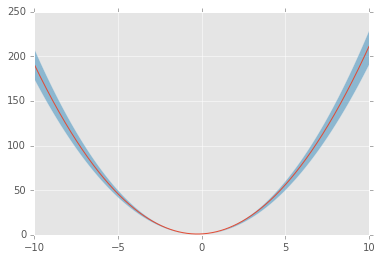

In [15]:
def err_num(x):
    return np.abs(x) * np.sqrt(c2n * x ** 2 + c1n * x + c0n)

errs = err_num(xs)

plt.plot(xs, ys)
plt.fill_between(xs, ys - errs, ys + errs, alpha=0.5)
plt.show()

---
## Aufgabe 3
Lösen Sie die obigen Teilaufgaben für $y = f(x)$ mit

$$y = \ln\left(1 + a_1x + a_2x^2\right) \quad \text{bzw.} \quad y = \ln\left(1 + \frac{x(1+x)}{b_1} + \frac{x(x-1)}{b_2}\right)$$

Im folgenden nennen wir das neue $y$ der Einfachheit halber $z$.

\begin{equation}
    z = \ln(1 + a_1x + a_2x^2) = \ln(y)
\end{equation}

Für die Unsicherheit von $z$ ergibt sich

\begin{align}
    \sigma_z &= \sqrt{\left(\frac{\partial z}{\partial y}\right)^2\sigma_y^2} \\
             &= \sqrt{\left(\frac{1}{y}\right)^2\sigma_y^2} \\
             &= \left\lvert\frac{\sigma_y}{y}\right\rvert \\
             &= \frac{0.2\lvert x\rvert\sqrt{1 + 0.25x^2 - 0.4x}}{\lvert 1 + a_1 x + a_2 x^2 \rvert} \,.
\end{align}

Völlig analog ist die Rechnung für die Reparametrisierung. Hier ergibt sich

\begin{align}
    \sigma_z &= \left\lvert\frac{\sigma_y}{y}\right\rvert \\
             &= \frac{\lvert{}x\rvert\sqrt{0.025x^2 + 0.0425x + 0.0325}}{\left\lvert 1 + \frac{x(1+x)}{b_1} + \frac{x(x-1)}{b_2}\right\rvert} \,.
\end{align}

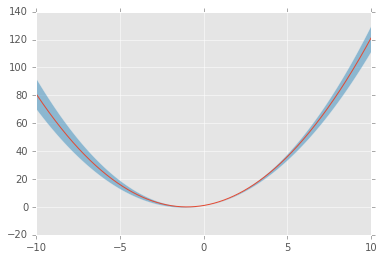

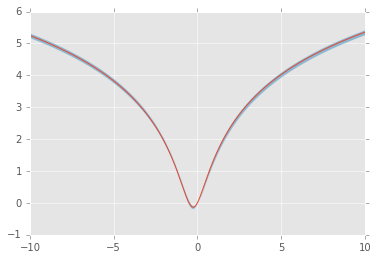

In [16]:
def err1(x):
    return 0.2 * np.abs(x) * np.sqrt(1 + 0.25 * x ** 2 - 0.4 * x) / np.abs(1)


def err2(x):
    return np.abs(x) * np.sqrt(c2 * x ** 2 + c1 * x + c0) / np.abs(1 + xs * (xs + 1) / b1 + xs * (xs - 1) / b2)


xs = np.linspace(-10, 10, 10000)
ys1 = 1 + a1 * xs + a2 * xs ** 2
ys2 = np.log(1 + xs * (xs + 1) / b1 + xs * (xs - 1) / b2)
errs1 = err1(xs)
errs2 = err2(xs)


plt.plot(xs, ys1)
plt.fill_between(xs, ys1 - errs1, ys1 + errs1, alpha=0.5)
plt.show()

plt.plot(xs, ys2)
plt.fill_between(xs, ys2 - errs2, ys2 + errs2, alpha=0.5)
plt.show()